# Free YouTube Comment Suite Data
[Youtube-comment-suite](https://github.com/mattwright324/youtube-comment-suite) is a powerful tool for collecting data related to YouTube channels, accounts, and networks of accounts. To make the most of the data which youtube-comment-suite collects I've fashoned this simple notebook which reads the commentsuite.sqlite3 file into pandas for additional analysis, filtering, and visualization. This was used in an upcoming article detailing a deepfake-crypto-livestream-scam on YouTube.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [14]:
# Connect to the SQLite database
conn = sqlite3.connect(f'../../../Tools/youtube-comment-suite-v1.4.8/commentsuite.sqlite3')

# Get the list of tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

# Print the list of tables
print("List of tables:")
print(tables)

# Iterate over each table and preview the head
for table_name in tables['name']:
    print(f"\nPreview of table: {table_name}")
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5", conn)
    print(df.head())

# Close the database connection
conn.close()

List of tables:
                 name
0          gitem_type
1          gitem_list
2              groups
3         group_gitem
4         gitem_video
5              videos
6            comments
7  comments_moderated
8        comment_tags
9            channels

Preview of table: gitem_type
   type_id nameProperty
0        0        video
1        1      channel
2        2     playlist

Preview of table: gitem_list
                   gitem_id  type_id           title   channel_title  \
0  UCRU9vwwARx8jEACqNpi_KFA        1  Champs Network  Champs Network   

       published   last_checked  \
0  1503230327000  1718765559140   

                                           thumb_url  
0  https://yt3.ggpht.com/3Bqc2C4olP7tU_VB-qY1nTk3...  

Preview of table: groups
                           group_id      group_name
0  28da132f5f5b48d881264d892aba790a         Default
1  31a85e462b267e4f1f80b6e63ea77e01  Champs Network

Preview of table: group_gitem
                           group_id            

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect(f'../../../Tools/youtube-comment-suite-v1.4.8/commentsuite.sqlite3')

# Read the data from the "videos" table into a DataFrame
df_videos = pd.read_sql_query("SELECT * FROM videos", conn)

# Close the database connection
conn.close()

# Print the DataFrame
df_videos

In [41]:
df_v = (df_videos
             .assign(datetime = lambda x: pd.to_datetime(x['publish_date'], unit='ms'))
             ['datetime']
             .reset_index()
             .sort_values('datetime', ascending=False)
             .assign(week = lambda x: x['datetime'].dt.to_period('W'))
             
        )

In [74]:
df_v.groupby(pd.Grouper(key='datetime', freq='W'))['datetime'].count().agg('mean')

8.643724696356275

In [77]:
# Group by week and count the occurrences
weekly_counts = df_v.groupby(pd.Grouper(key='datetime', freq='W'))['datetime'].count()

# Calculate the rolling average with a window of your choice, e.g., 4 weeks
rolling_avg = weekly_counts.rolling(window=12).mean()

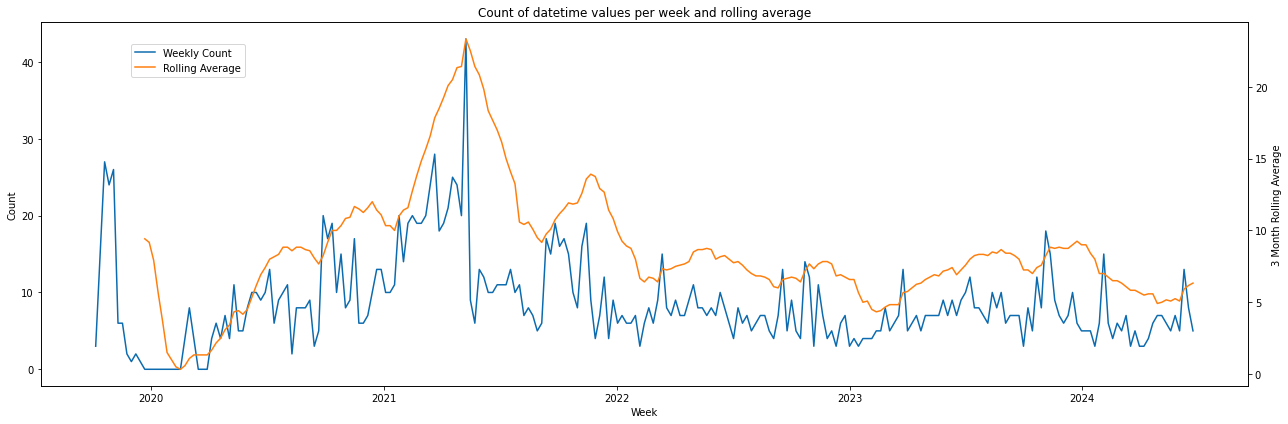

In [79]:
# Plot the weekly counts
fig, ax1 = plt.subplots(figsize=(18,6))

ax1.set_xlabel('Week')
ax1.set_ylabel('Count')
ax1.plot(weekly_counts.index, weekly_counts, color='#0C6BAE', label='Weekly Count')
ax1.tick_params(axis='y')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('3 Month Rolling Average')
ax2.plot(rolling_avg.index, rolling_avg, color='#FF7F0E', label='Rolling Average')
ax2.tick_params(axis='y')

# Add titles and legends
plt.title('Count of datetime values per week and rolling average')
fig.tight_layout()  # Adjust layout to prevent overlap
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

### Comments

In [ ]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect(f'../../../Tools/youtube-comment-suite-v1.4.8/commentsuite.sqlite3')

# Read the data from the "videos" table into a DataFrame
df_c = pd.read_sql_query("SELECT * FROM comments", conn)

# Close the database connection
conn.close()

# Print the DataFrame
df_c

<Axes: xlabel='datetime', ylabel='comment_len'>

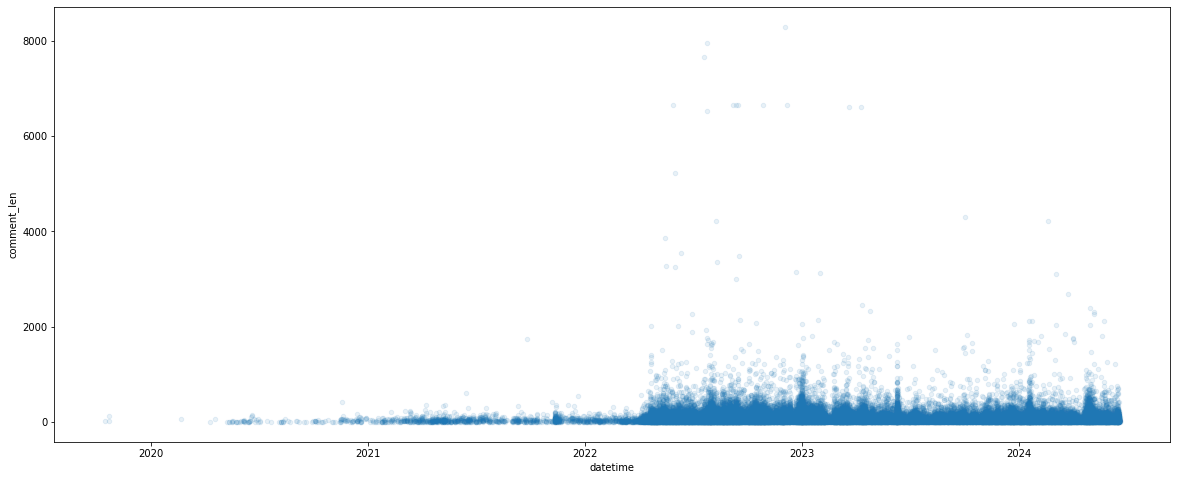

In [149]:
(df_c.assign(datetime = lambda x: pd.to_datetime(x['comment_date'], unit='ms'),
            comment_len = lambda x: x['comment_text'].agg(len),
            count = 1)
     .groupby(['comment_len', pd.Grouper(key='datetime', freq='D')])['count'].count().reset_index(level=0)
     .sort_index(ascending=False)
     .reset_index().plot.scatter( x='datetime', y='comment_len', alpha=0.1, figsize=(20,8))
 
     
 
)